# Análisis cinemático de mecanismos

## Ejemplos resueltos

Para todos los ejemplos resueltos, asumiremos que hemos importado, previamente, la librería SymPy, de la siguiente manera:

In [29]:
from sympy import *
from sympy.matrices import Matrix

Y que hemos colocado la instrucción `init_printing` para *renderizar* las expresiones de SymPy:

In [30]:
init_printing()

<hr style="border-top: 3px solid #070707;">

**Ejemplo 1**. En la figura se muestra una placa rectangular de (300x180) mm, la cual está rotando a una velocidad angular constante de 65 rad/s en el sentido de las manecillas del reloj. Calcule la velocidad y aceleración de los puntos $P$, $Q$ y $M$, para la posición esquematizada.

<img src="img/acm/rectangular_plate.svg">

*Solución*

Comenzamos definiendo el vector de velocidad angular, el ángulo de 30° y las dimensiones de la placa:

In [31]:
w = Matrix([0,0,-65]) # Vector de velocidad angular
th = rad(30).evalf() # Ángulo en radianes
b = 300 # Base de la placa
h = 180 # Alto de la placa

Para la velocidad del punto $Q$ sabemos que:

$$ \vec{v}_Q = \vec{\omega} \times \vec{r}_{Q/O}$$

Entonces:

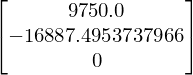

In [32]:
rQO = Matrix([b*cos(th), b*sin(th), 0]) # Vector r_Q/O
vQ = w.cross(rQO) # Velocidad del punto del punto Q
vQ 

De manera similar se puede proceder para las velocidades de los puntos $M$ y $P$.

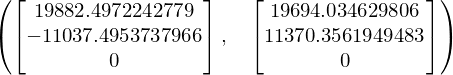

In [33]:
beta = atan(h/b)
tQ = th + beta # ángulo formado por el vector r_M/O con respecto a la horizontal
tP = th + pi/2 # ángulo formado por el vector r_P/O con respecto a la horizontal
r = sqrt(h**2 + b**2) # diagonal del rectángulo
rMO = Matrix([r*cos(tQ), r*sin(tQ), 0])
rPO = Matrix([r*cos(tP), r*sin(tP), 0])

vM = w.cross(rMO) # velocidad de M
vP = w.cross(rPO) # velocidad de P

vM.evalf(), vP.evalf()

Para las aceleraciones, dado que $\omega$ es constante, entonces, $\alpha=0$.

La aceleración del punto $Q$ se puede calcular como:

$$ \vec{a}_Q = \vec{\alpha} \times \vec{r}_{Q/O} + \vec{\omega} \times \left( \vec{\omega} \times \vec{r}_{Q/O} \right)  $$

Entonces:

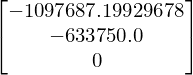

In [34]:
alpha = Matrix([0,0,0]) # vector de velocidad angular

aQ = alpha.cross(rQO) + w.cross(w.cross(rQO)) # Aceleración de Q
aQ

De manera similar para las aceleraciones de $P$ y $M$:

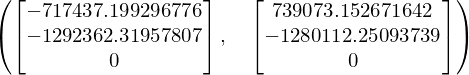

In [35]:
aM = alpha.cross(rMO) + w.cross(w.cross(rMO))
aP = alpha.cross(rPO) + w.cross(w.cross(rPO))

aM.evalf(), aP.evalf()

<hr style="border-top: 3px solid #070707;">

**Ejemplo 2.** El bloque ubicado en $A$ se desplaza a 100 mm/s hacia arriba en el instante en que $\varphi = 60°$. Calcule la velocidad angular de la barra $AB$ y la velocidad del bloque en $B$. Considere que la barra $AB$ mide 500 mm.

<img src="img/acm/double_slider.svg">

*Solución*

In [50]:
L = 500 # longitud de la barra AB (mm)
phi = rad(60).evalf()
VA = Matrix([0,100,0]) # vector de velocidad de A
vB = symbols("v_B") # 
VB = Matrix([vB,0,0]) # vector de velocidad de B
wAB = symbols("\\omega_{AB}")
WAB = Matrix([0,0,wAB]) # vector de velocidad angular AB
RBA = Matrix([L*cos(phi), L*sin(phi), 0])

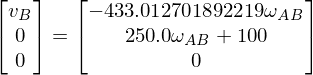

In [51]:
ecvr = Eq(VB, VA + WAB.cross(RBA)) # ecuación de velocidad relativa
ecvr

In [52]:
solve(ecvr) # resolviendo la ecuación de velocidad relativa